In [1]:
import pandas as pd
import numpy as np
from os.path import join, abspath

In [2]:
train_csv = join(abspath(''), 'train_AV.csv')
test_csv = join(abspath(''), 'test_AV.csv')

In [3]:
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

In [4]:
train.drop(['Loan_ID', 'Loan_Status'], 1, inplace = True)

In [5]:
test.drop(['Loan_ID'], 1, inplace = True)

In [6]:
# NEW labels for a dataset: 1 Test, 0 Train

train['dataset_label'] = 0
test['dataset_label'] = 1

# combine 2 datasets

df_master = train.append(test)

# get dummies for categorical variables
df_master = pd.get_dummies(df_master, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History'])

In [7]:
# shuffle all data

df_master = df_master.sample(frac = 1)

In [8]:
# fill all missing values and drop the null values
df_master.fillna(-1, inplace = True)
df_master.drop_duplicates(inplace=True)

 umap plot 
UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimension reduction.
UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology

In [9]:
def plot_umap_for_dataset(df, labels, n_deighbors = 3):
    mapper = umap.UMAP(n_deighbors = n_deighbors, min_dist = 0.3,
                      metric = 'correlation').fit(df.values)
    umap.plot.points(mapper, labels = target, theme = 'fire')

In [10]:
def create_adversarial_data(df):
    df = df.sample(frac = 1)
    adversarial_train = df[: len(train)]
    adversarial_test = df[len(train):]
    
    return adversarial_train, adversarial_test
    

In [11]:
adversarial_train, adversarial_test = create_adversarial_data(df_master)
print(adversarial_train.shape, adversarial_test.shape)
adversarial_train

(614, 22) (366, 22)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,dataset_label,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
83,8449,0.0,257.0,360.0,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
322,3601,1590.0,-1.0,360.0,0,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
89,5058,0.0,200.0,360.0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
190,4333,0.0,132.0,84.0,1,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
433,2425,2340.0,143.0,360.0,0,0,1,0,1,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5166,0.0,128.0,360.0,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
124,12500,0.0,300.0,360.0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
233,8333,0.0,280.0,360.0,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
275,2773,1497.0,108.0,360.0,1,0,1,0,1,0,...,1,1,0,1,0,0,1,0,0,1


In [12]:
# Params for the model
params = {
    'iterations': 500,
    'eval_metric': 'AUC'
}

In [13]:
from catboost import Pool
train_data = Pool(
    data = adversarial_train.drop('dataset_label', 1),
    label = adversarial_train['dataset_label'])

holdout_data = Pool(
    data = adversarial_test.drop('dataset_label', 1),
    label = adversarial_test['dataset_label'])

In [14]:
# Train catboost model on training data
from catboost import CatBoostClassifier 

model = CatBoostClassifier(** params)
_ = model.fit(train_data, eval_set= holdout_data, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-bright')


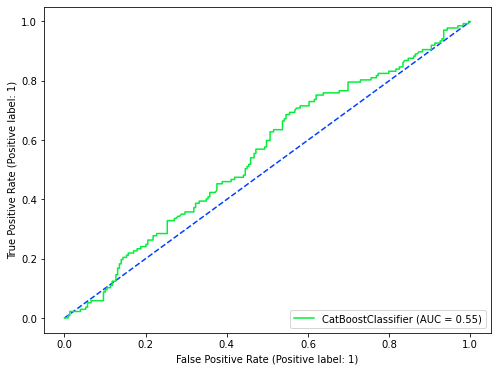

In [39]:

from sklearn.metrics import plot_roc_curve
# with plt.xkcd():
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
plot_roc_curve(model, adversarial_test.drop('dataset_label', 1), adversarial_test['dataset_label'], ax = ax)
plt.show()

In [40]:
# to see all availabple styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']